# 과소적합과 과대적합
### 과소적합
- 문제의 난이도에 비해 모델 복잡도가 너무 낮으면 발생
### 과대적합
- 문제를 너무 어렵게 풀다 보면 발생

# Drop-out
- Drop-out Rate (0~1)의 확률로 뉴런을 제거하는 기법
### 1) 학습 단계에서 Drop-out
- Mini-배치 학습을 할 때, 각 배치별로 매번 새로운 Droup-out을 적용하여 학습.

### 2) 추론 단계에서 Drop-out
- 추론 단계에서는 모든 뉴런을 함께 사용한다. 단, 이 때 Scaling을 적용한다. <br>


> 일부의 특징(Drop-out의 특정 Realization)만을 사용해서도 좋은 결과를 낼 수 있다.
> 각각의 가능성에 대해 좋은 결과를 내도록 학습할 경우, 이를 평균하면 균형있는 결과를 얻는다.<br> <br>

    > 즉, 어느 특정한 Feature에 집중하여 Overfitting 되는 결과를 막아준다. 

# Overfitting 방지 실습해보기

### import Modules

### 하이퍼 파라미터 정의

In [5]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
EPOCHS = 50

### 네트워크 구조 정의

In [9]:
class MyModel(tf.keras.Model):
    def __init__(self):
        super(MyModel, self).__init__() # tf.keras.Model의 init 함수를 먼저 call 해줌.
        self.flatten = tf.keras.layers.Flatten() # 28 x 28 = 784
        # 28 x 28 영상형태의 MNIST를 Vector 형태로 Flatten 해줌.
        self.dense1 = tf.keras.layers.Dense(64, activation='relu')
        self.dense2 = tf.keras.layers.Dense(64, activation='relu')
        self.dense3 = tf.keras.layers.Dense(64, activation='relu')
        self.dense4 = tf.keras.layers.Dense(64, activation='relu')
        self.dense5 = tf.keras.layers.Dense(10, activation='softmax')
# self.dense5는 출력함수, 10개를 출력할 것이며, Multiclass_classification을 위해서는 'softmax' activation을 사용해야한다.
    def call(self, x, training=None, mask=None):
        h = self.flatten(x)
        h = self.dense1(h)
        h = self.dense2(h)
        h = self.dense3(h)
        h = self.dense4(h)
        return self.dense5(h)

### 데이터 불러오기

In [10]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

x_train = x_train.astype(np.float32)
x_test = x_test.astype(np.float32)

train_ds = tf.data.Dataset.from_tensor_slices((x_train, y_train)).shuffle(10000).batch(32).prefetch(2048)
test_ds = tf.data.Dataset.from_tensor_slices((x_test, y_test)).batch(32).prefetch(2048)

### 모델 생성

In [11]:
model = MyModel()

model.compile(optimizer='adam',
loss='sparse_categorical_crossentropy',
metrics=['accuracy'])

### 모델 학습

In [12]:
history = model.fit(train_ds, validation_data=test_ds, epochs=EPOCHS)

Epoch 1/50
1875/1875 [==============================] - 1s 599us/step - loss: 0.7097 - accuracy: 0.7465 - val_loss: 0.4473 - val_accuracy: 0.8395
Epoch 2/50
1875/1875 [==============================] - 1s 579us/step - loss: 0.3959 - accuracy: 0.8546 - val_loss: 0.4017 - val_accuracy: 0.8512
Epoch 3/50
1875/1875 [==============================] - 1s 562us/step - loss: 0.3500 - accuracy: 0.8717 - val_loss: 0.3731 - val_accuracy: 0.8682
Epoch 4/50
1875/1875 [==============================] - 1s 562us/step - loss: 0.3224 - accuracy: 0.8804 - val_loss: 0.3717 - val_accuracy: 0.8664
Epoch 5/50
1875/1875 [==============================] - 1s 566us/step - loss: 0.3063 - accuracy: 0.8852 - val_loss: 0.3879 - val_accuracy: 0.8588
Epoch 6/50
1875/1875 [==============================] - 1s 547us/step - loss: 0.2958 - accuracy: 0.8910 - val_loss: 0.3629 - val_accuracy: 0.8740
Epoch 7/50
1875/1875 [==============================] - 1s 561us/step - loss: 0.2814 - accuracy: 0.8941 - val_loss: 0.3579 -

### Matplotlib을 이용한 시각화

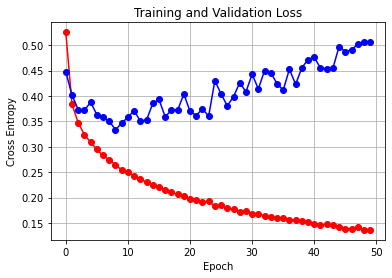

In [20]:
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure()
plt.plot(loss, 'ro-')
plt.plot(val_loss, 'bo-')
plt.ylabel('Cross Entropy')
plt.xlabel('Epoch')
plt.title('Training and Validation Loss')
plt.grid()
plt.show()

- loss는 점점 감소하는 반면, validation_loss는 증가하는 추세를 보임.
- 어느 정도 optimize된 zone과 overfitting된 zone 구분 가능.

### 이를 개선하기 위해서는 ?

In [ ]:
model = MyModel()

model.compile(optimizer='adam',
loss='sparse_categorical_crossentropy',
metrics=['accuracy'])

### Early Stopping Callback

In [21]:
earlystopper = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, verbose=1)

In [22]:
history = model.fit(train_ds, validation_data=test_ds, epochs=EPOCHS, callbacks=[earlystopper])

Epoch 1/50
1875/1875 [==============================] - 1s 561us/step - loss: 0.1351 - accuracy: 0.9471 - val_loss: 0.4972 - val_accuracy: 0.8847
Epoch 2/50
1875/1875 [==============================] - 1s 556us/step - loss: 0.1337 - accuracy: 0.9489 - val_loss: 0.5054 - val_accuracy: 0.8836
Epoch 3/50
1875/1875 [==============================] - 1s 552us/step - loss: 0.1309 - accuracy: 0.9485 - val_loss: 0.5498 - val_accuracy: 0.8781
Epoch 4/50
1875/1875 [==============================] - 1s 558us/step - loss: 0.1311 - accuracy: 0.9494 - val_loss: 0.5405 - val_accuracy: 0.8805
Epoch 5/50
1875/1875 [==============================] - 1s 554us/step - loss: 0.1287 - accuracy: 0.9500 - val_loss: 0.5447 - val_accuracy: 0.8816
Epoch 6/50
1875/1875 [==============================] - 1s 567us/step - loss: 0.1288 - accuracy: 0.9503 - val_loss: 0.5101 - val_accuracy: 0.8835
Epoch 7/50
1875/1875 [==============================] - 1s 566us/step - loss: 0.1300 - accuracy: 0.9504 - val_loss: 0.5485 -

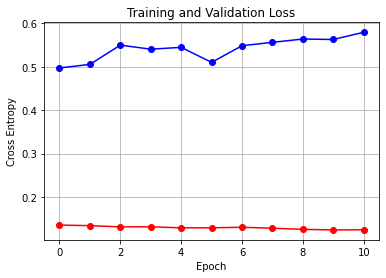

In [23]:
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure()
plt.plot(loss, 'ro-')
plt.plot(val_loss, 'bo-')
plt.ylabel('Cross Entropy')
plt.xlabel('Epoch')
plt.title('Training and Validation Loss')
plt.grid()
plt.show()

- Validation의 학습이 처음부터 안 된 것으로 나타남.

### Drop-Out을 이용해 모델을 개선해보자.

In [28]:
class MyModel(tf.keras.Model):
    def __init__(self):
        super(MyModel, self).__init__() # tf.keras.Model의 init 함수를 먼저 call 해줌.
        self.flatten = tf.keras.layers.Flatten() # 28 x 28 = 784
        # 28 x 28 영상형태의 MNIST를 Vector 형태로 Flatten 해줌.
        self.dense1 = tf.keras.layers.Dense(64, activation='relu')
        self.dense2 = tf.keras.layers.Dense(64, activation='relu')
        self.dense3 = tf.keras.layers.Dense(64, activation='relu')
        self.dense4 = tf.keras.layers.Dense(64, activation='relu')
        self.dropout4 = tf.keras.layers.Dropout(0.5)
        self.dense5 = tf.keras.layers.Dense(10, activation='softmax')
# self.dense5는 출력함수, 10개를 출력할 것이며, Multiclass_classification을 위해서는 'softmax' activation을 사용해야한다.
    def call(self, x, training=None, mask=None):
        h = self.flatten(x)
        h = self.dense1(h)
        h = self.dense2(h)
        h = self.dense3(h)
        h = self.dense4(h)
        h = self.dropout4(h)
        return self.dense5(h)

In [29]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

x_train = x_train.astype(np.float32)
x_test = x_test.astype(np.float32)

train_ds = tf.data.Dataset.from_tensor_slices((x_train, y_train)).shuffle(10000).batch(32).prefetch(2048)
test_ds = tf.data.Dataset.from_tensor_slices((x_test, y_test)).batch(32).prefetch(2048)

In [30]:
model = MyModel()

model.compile(optimizer='adam',
loss='sparse_categorical_crossentropy',
metrics=['accuracy'])

In [31]:
history = model.fit(train_ds, validation_data=test_ds, epochs=EPOCHS, callbacks=[earlystopper])

Epoch 1/50
1875/1875 [==============================] - 1s 621us/step - loss: 1.7801 - accuracy: 0.5915 - val_loss: 0.6826 - val_accuracy: 0.7948
Epoch 2/50
1875/1875 [==============================] - 1s 588us/step - loss: 1.0058 - accuracy: 0.7306 - val_loss: 0.7365 - val_accuracy: 0.8118
Epoch 3/50
1875/1875 [==============================] - 1s 569us/step - loss: 1.0810 - accuracy: 0.7590 - val_loss: 0.7595 - val_accuracy: 0.8234
Epoch 4/50
1875/1875 [==============================] - 1s 585us/step - loss: 1.0631 - accuracy: 0.7755 - val_loss: 0.7827 - val_accuracy: 0.8287
Epoch 5/50
1875/1875 [==============================] - 1s 575us/step - loss: 1.2498 - accuracy: 0.7778 - val_loss: 1.0183 - val_accuracy: 0.8286
Epoch 6/50
1875/1875 [==============================] - 1s 573us/step - loss: 1.3429 - accuracy: 0.7838 - val_loss: 0.9586 - val_accuracy: 0.8389
Epoch 7/50
1875/1875 [==============================] - 1s 585us/step - loss: 1.3299 - accuracy: 0.7876 - val_loss: 1.2084 -

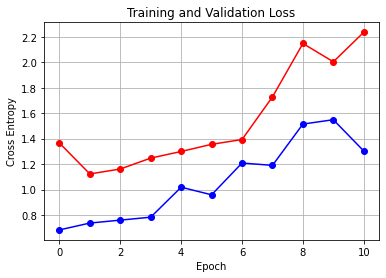

In [32]:
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure()
plt.plot(loss, 'ro-')
plt.plot(val_loss, 'bo-')
plt.ylabel('Cross Entropy')
plt.xlabel('Epoch')
plt.title('Training and Validation Loss')
plt.grid()
plt.show()

- Dropout이 힘을 잘 쓰지 못 했음.
### dense4의 뉴런 갯수를 늘려서 재시작

In [33]:
class MyModel(tf.keras.Model):
    def __init__(self):
        super(MyModel, self).__init__() # tf.keras.Model의 init 함수를 먼저 call 해줌.
        self.flatten = tf.keras.layers.Flatten() # 28 x 28 = 784
        # 28 x 28 영상형태의 MNIST를 Vector 형태로 Flatten 해줌.
        self.dense1 = tf.keras.layers.Dense(64, activation='relu')
        self.dense2 = tf.keras.layers.Dense(64, activation='relu')
        self.dense3 = tf.keras.layers.Dense(64, activation='relu')
        self.dense4 = tf.keras.layers.Dense(128, activation='relu')
        self.dropout4 = tf.keras.layers.Dropout(0.5)
        self.dense5 = tf.keras.layers.Dense(10, activation='softmax')
# self.dense5는 출력함수, 10개를 출력할 것이며, Multiclass_classification을 위해서는 'softmax' activation을 사용해야한다.
    def call(self, x, training=None, mask=None):
        h = self.flatten(x)
        h = self.dense1(h)
        h = self.dense2(h)
        h = self.dense3(h)
        h = self.dense4(h)
        h = self.dropout4(h)
        return self.dense5(h)

In [34]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

x_train = x_train.astype(np.float32)
x_test = x_test.astype(np.float32)

train_ds = tf.data.Dataset.from_tensor_slices((x_train, y_train)).shuffle(10000).batch(32).prefetch(2048)
test_ds = tf.data.Dataset.from_tensor_slices((x_test, y_test)).batch(32).prefetch(2048)

In [35]:
model = MyModel()

model.compile(optimizer='adam',
loss='sparse_categorical_crossentropy',
metrics=['accuracy'])

In [36]:
history = model.fit(train_ds, validation_data=test_ds, epochs=EPOCHS, callbacks=[earlystopper])

Epoch 1/50
1875/1875 [==============================] - 1s 656us/step - loss: 1.3373 - accuracy: 0.6284 - val_loss: 0.5789 - val_accuracy: 0.8062
Epoch 2/50
1875/1875 [==============================] - 1s 642us/step - loss: 0.6039 - accuracy: 0.8033 - val_loss: 0.4693 - val_accuracy: 0.8361
Epoch 3/50
1875/1875 [==============================] - 1s 600us/step - loss: 0.5133 - accuracy: 0.8301 - val_loss: 0.4905 - val_accuracy: 0.8439
Epoch 4/50
1875/1875 [==============================] - 1s 623us/step - loss: 0.4876 - accuracy: 0.8382 - val_loss: 0.4355 - val_accuracy: 0.8525
Epoch 5/50
1875/1875 [==============================] - 1s 625us/step - loss: 0.4450 - accuracy: 0.8532 - val_loss: 0.4322 - val_accuracy: 0.8532
Epoch 6/50
1875/1875 [==============================] - 1s 608us/step - loss: 0.4177 - accuracy: 0.8602 - val_loss: 0.4171 - val_accuracy: 0.8584
Epoch 7/50
1875/1875 [==============================] - 1s 619us/step - loss: 0.4076 - accuracy: 0.8629 - val_loss: 0.4449 -

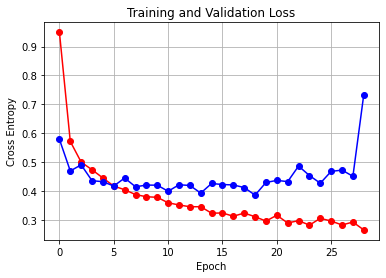

In [37]:
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure()
plt.plot(loss, 'ro-')
plt.plot(val_loss, 'bo-')
plt.ylabel('Cross Entropy')
plt.xlabel('Epoch')
plt.title('Training and Validation Loss')
plt.grid()
plt.show()

- Dramatic하게 좋아지지는 않았음.
- EarlyStopper를 통해 무한하게 올라가는 것을 막을 수 있었음.